# 02.Data Exploration

This scrip contains a quick data exploration of the dataset created in the previous step (Template).

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
route = 'Reverse_Logistics_Template.xlsx'
template = pd.read_excel(route)
template.head()

,Customer,Lane_ID,Origin_Country,Destination_Country,Origin_Port,Destination_Port,Origin_City,Destination_City,Equipment_Type,Shipping_Terms,Commodity,Volume
0,CustomerB,1089,ID,CN,Makassar,Xingang/Tianjin,Makassar,Xingang,20' Standard Dry,Port to Port,Cocoa Liquor,60.0
1,CustomerB,1090,ID,CN,Makassar,Shanghai,Makassar,Shanghai,20' Standard Dry,Port to Port,Cocoa Liquor,140.0
2,CustomerB,1093,CN,TH,Shanghai,Bangkok (Pat/Lat Krabang/Laem Chabang),Shanghai,Bangkok,20' Reefer,Port to Port,Confectionary,10.0
3,CustomerB,1094,CN,TH,Shanghai,Bangkok (Pat/Lat Krabang/Laem Chabang),Shanghai,Bangkok,40' Reefer,Port to Port,Confectionary,70.0
4,CustomerB,1095,CN,VN,Shanghai,Cat Lai,Shanghai,Ho Chi Minh,20' Reefer,Port to Port,Confectionary,5.0


## Total containers by Customer

Text(0.5, 1.0, 'Tender Volume by Customer')

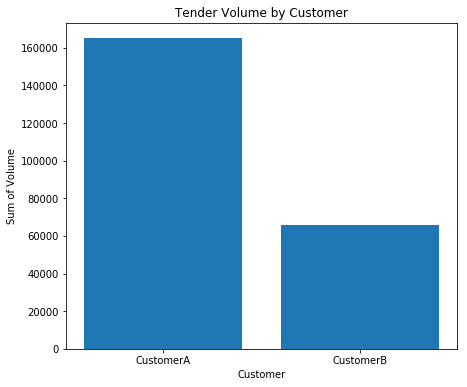

In [37]:
volume_by_customer = template.groupby("Customer").sum()
volume_by_customer.reset_index(level=0, inplace=True)
x = volume_by_customer['Customer'].values
y = volume_by_customer['Volume'].values
fig, ax = plt.subplots(figsize=(7,6))
plt.bar(x, y)
plt.xlabel("Customer")
plt.ylabel("Sum of Volume")
plt.title("Tender Volume by Customer")

## Top 10 Origin Countries by Volume

Text(0.5, 1.0, 'Tender Volume by Origin Country')

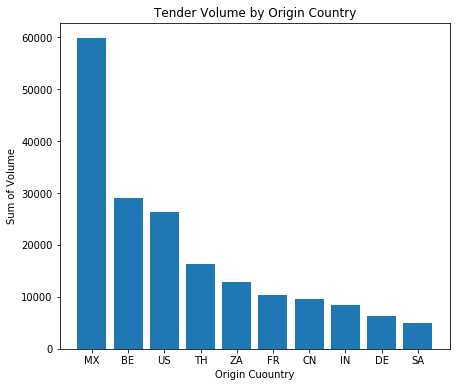

In [38]:
volume_by_origin = template.groupby("Origin_Country").sum().sort_values('Volume', ascending=False)
volume_by_origin = volume_by_origin.head(10)
volume_by_origin.reset_index(level=0, inplace=True)
x = volume_by_origin['Origin_Country'].values
y = volume_by_origin['Volume'].values
fig, ax = plt.subplots(figsize=(7,6))
plt.bar(x, y)
plt.xlabel("Origin Cuountry")
plt.ylabel("Sum of Volume")
plt.title("Tender Volume by Origin Country")

## Top 10 Destination Countries by Volume

Text(0.5, 1.0, 'Tender Volume by Destination Country')

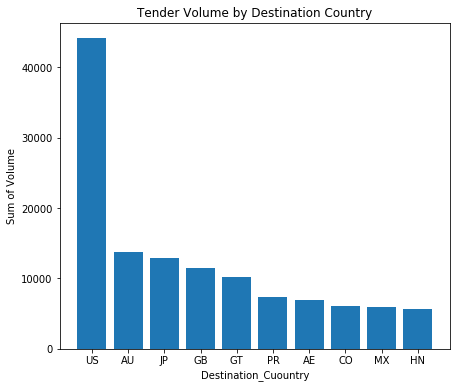

In [39]:
volume_by_destination = template.groupby("Destination_Country").sum().sort_values('Volume', ascending=False)
volume_by_destination = volume_by_destination.head(10)
volume_by_destination.reset_index(level=0, inplace=True)
x = volume_by_destination['Destination_Country'].values
y = volume_by_destination['Volume'].values
fig, ax = plt.subplots(figsize=(7,6))
plt.bar(x, y)
plt.xlabel("Destination_Cuountry")
plt.ylabel("Sum of Volume")
plt.title("Tender Volume by Destination Country")

## Volume by Equipment Type

In [40]:
template['Equipment_Type'].unique()

array(["20' Standard Dry", "20' Reefer", "40' Reefer", "40' High Cube",
       "40' Standard Dry", "45' High Cube", "53' High Cube", "40' Refeer",
       "20' High Cube", "20' Refeer", "20' Flexi tank"], dtype=object)

Text(0.5, 1.0, 'Tender Volume by Destination Country')

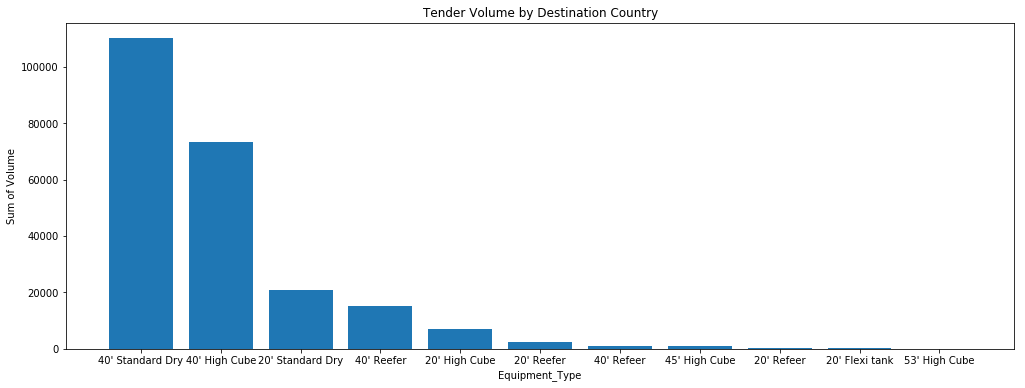

In [41]:
volume_by_equipment = template.groupby('Equipment_Type').sum().sort_values('Volume', ascending=False)
volume_by_equipment.reset_index(level=0, inplace=True)
x = volume_by_equipment['Equipment_Type'].values
y = volume_by_equipment['Volume'].values
fig, ax = plt.subplots(figsize=(17,6))
plt.bar(x, y)
plt.xlabel("Equipment_Type")
plt.ylabel("Sum of Volume")
plt.title("Tender Volume by Destination Country")

## Countries by exports and imports

In [42]:
country_exports = template.groupby('Origin_Country').sum()
country_exports = country_exports.rename({'Volume': 'Export_Volume'}, axis=1)
country_imports = template.groupby('Destination_Country').sum()
country_imports = country_imports.rename({'Volume': 'Import_Volume'}, axis=1)
total_by_country = pd.concat([country_exports, country_imports], axis = 1, join = 'inner')
total_by_country.reset_index(level=0, inplace=True)
total_by_country = total_by_country.rename({'index': 'Country'}, axis=1)
total_by_country.head()

,Country,Export_Volume,Import_Volume
0,AE,80.0,6958.338415
1,AR,253.0,318.595059
2,AU,4629.0,13826.531584
3,BD,20.0,14.000000
4,BE,29005.0,2017.030238


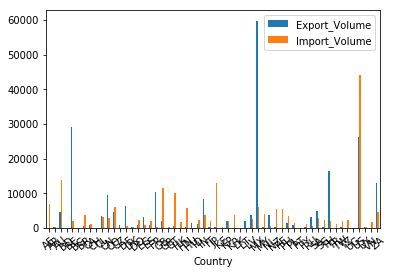

In [43]:
fig, ax = plt.subplots()
total_by_country.plot.bar(x = 'Country', y = ['Export_Volume', 'Import_Volume'], rot = 40, ax = ax)


In [44]:
#Let's see the import and export volumes for countries with more volume

In [45]:
#For Exports (Origin_Country)

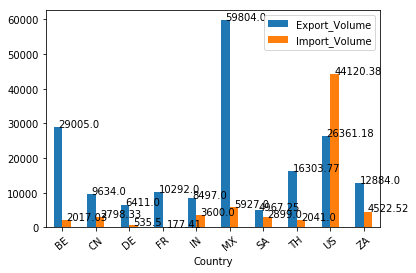

In [46]:
exports_with_imports = total_by_country[total_by_country['Country'].isin(['MX', 'BE', 'US', 'TH', 'ZA', 'FR', 'CN', 'IN', 'DE', 'SA'])]
fig, ax = plt.subplots()
exports_with_imports.plot.bar(x = 'Country', y = ['Export_Volume', 'Import_Volume'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

In [47]:
#With this, we see that there is a big chance to combine countries such as US, ZA and the MX

#Let's do the same but now for the top 10 importes (Destination City)

In [48]:
volume_by_destination['Destination_Country']

0    US
1    AU
2    JP
3    GB
4    GT
5    PR
6    AE
7    CO
8    MX
9    HN
Name: Destination_Country, dtype: object

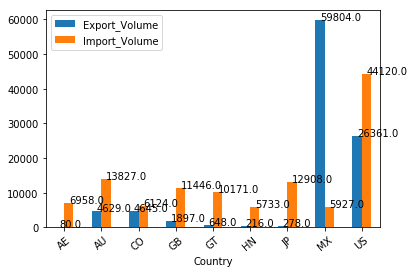

In [51]:
imports_with_exports = total_by_country[total_by_country['Country'].isin(['US', 'AU', 'JP', 'GB', 'GT', 'PR', 'AE', 'CO', 'MX', 'HN'])]
fig, ax = plt.subplots()
imports_with_exports.plot.bar(x = 'Country', y = ['Export_Volume', 'Import_Volume'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(), decimals=False), (p.get_x()+p.get_width()/2., p.get_height()))

In [50]:
# We see that we have the same countries, so for this exercise our main goal would be 
#to combine Imports and Exports from/to Mexico, USA and Australia